In [1]:
import pandas as pd
import matplotlib.pyplot as plt

github = pd.read_csv('crypto_github_events.csv')

In [2]:
github.head(10)
github1 = github.copy()

In [3]:
# rank the top 10 users who perform actions most in total
ten_most_actions = github.groupby(by = ['userID']).size().sort_values(ascending=False).head(10)
ten_most_actions = ten_most_actions.keys().tolist()

In [4]:
# filter the dataframe github so that it only includes entries of the top ten users
print(ten_most_actions)
top_user = github['userID'].isin(ten_most_actions)
github = github.loc[top_user]

['K3WbcDlZUBxBfx8Mv-twSg', 'yhHGzBppxhIRhPkWapTLJQ', '8iDsKCYEfcL4jeGKxNtPQg', 'Li47SClZy_BDxLTc0mN7bQ', 'lAMqEaTXdyY-pgrNTEAFjw', 'oVVUY8Nh5wNqJ0qLROKRkg', '-Tf7mnYl8kygw0ZctlhfOw', 'Rttu6fe4U29LzyZ8zU9RIQ', 'AIVdQMXja0fmjFk_ejf7ow', 'Qyz97YBv9rf-V3QYWhkSbw']


In [5]:
github['date'] = pd.to_datetime(github['date'])
github['date'] = github['date'].dt.strftime('%Y-%m')

In [6]:
# group the dataframe by userID and date to count the number of actions by each user in each month
actions_time = github.groupby(by=["userID","date"]).size()
actions_time = actions_time.to_frame()
actions_time = actions_time.reset_index()
actions_time.columns = ['userID', 'date','count']
actions_time.head(10)

,userID,date,count
0,-Tf7mnYl8kygw0ZctlhfOw,2015-02,5
1,-Tf7mnYl8kygw0ZctlhfOw,2015-03,1
2,-Tf7mnYl8kygw0ZctlhfOw,2015-04,1
3,-Tf7mnYl8kygw0ZctlhfOw,2015-05,4
4,-Tf7mnYl8kygw0ZctlhfOw,2015-08,5
5,-Tf7mnYl8kygw0ZctlhfOw,2015-11,23
6,-Tf7mnYl8kygw0ZctlhfOw,2015-12,442
7,-Tf7mnYl8kygw0ZctlhfOw,2016-01,100
8,-Tf7mnYl8kygw0ZctlhfOw,2016-02,468
9,-Tf7mnYl8kygw0ZctlhfOw,2016-03,357


In [7]:
# reorganize the dataframe and convert to a csv file
actions_time = pd.pivot_table(actions_time, index=['userID'],values='count',columns=['date'],fill_value=0)
actions_time.to_csv('top10.csv')

In [8]:
github1.head(10)
# rank the top 5 users who perform actions most in total
five_most_actions = ten_most_actions[:5]
top_five_user = github1['userID'].isin(five_most_actions)
github1 = github1.loc[top_five_user]
github1['date'] = github1['date'].str[:7]

In [9]:
github1 = github1[github1['date'].str[:4]=='2016']

K3WbcDlZUBxBfx8Mv-twSg
yhHGzBppxhIRhPkWapTLJQ
8iDsKCYEfcL4jeGKxNtPQg
Li47SClZy_BDxLTc0mN7bQ
lAMqEaTXdyY-pgrNTEAFjw


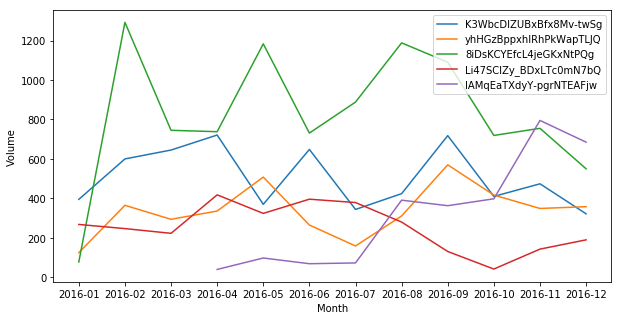

In [10]:
plot_data = github1.groupby(by=["userID","date"]).size()
plot_data = plot_data.to_frame().reset_index()
fig,ax = plt.subplots(figsize=(10,5))

for user in five_most_actions:
    print(user)
    ax.plot(plot_data[plot_data['userID']==user].date,plot_data[plot_data['userID']==user][0],label=user)

ax.set_xlabel("Month")
ax.set_ylabel("Volume")
ax.legend(loc='best')